# Visualization (seaborn) practice

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file_url = 'https://stepik.org/media/attachments/course/4852/StudentsPerformance.csv'
students_perf = pd.read_csv(file_url)
students_perf.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
students_perf.columns = students_perf.columns.str.replace(' ', '_')
students_perf.rename(columns={'race/ethnicity' : 'race_ethnicity'}, inplace=True)

### Визуализация Pandas
Подробнее:
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html  
На основе matplotlib

<AxesSubplot:>

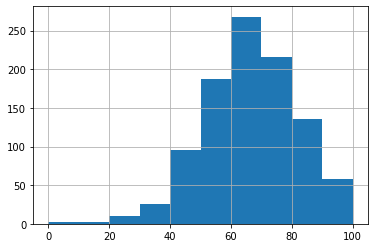

In [5]:
students_perf.math_score.hist()

<AxesSubplot:xlabel='math_score', ylabel='reading_score'>

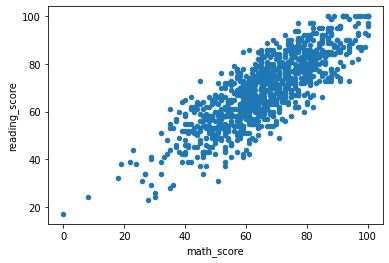

In [6]:
students_perf.plot.scatter(x='math_score', y='reading_score')

### Визуализация Matplotlib и Seaborn
Подробнее: https://matplotlib.org/  
https://seaborn.pydata.org/

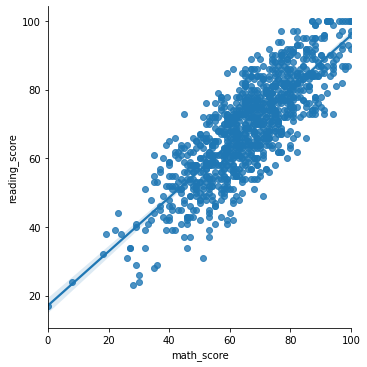

In [7]:
sns.lmplot(x='math_score', y='reading_score', data=students_perf)

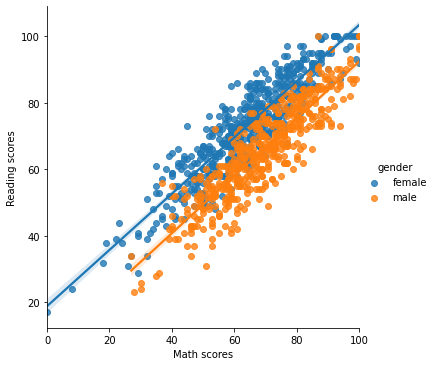

In [10]:
ax = sns.lmplot(x='math_score', y='reading_score', hue='gender', data=students_perf)
ax.set_xlabels('Math scores')
ax.set_ylabels('Reading scores');
# если поставить точку с запятой после построения графика, не будет выводиться информация о графике

### Способы нарисовать один и тот же простой график разными командами

In [48]:
df = pd.read_csv('https://stepik.org/media/attachments/course/4852/income.csv')
df.head(3)

,income
2018-11-30,20
2018-12-31,60
2019-01-31,180


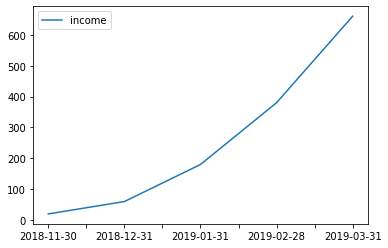

In [19]:
df.plot(kind='line');

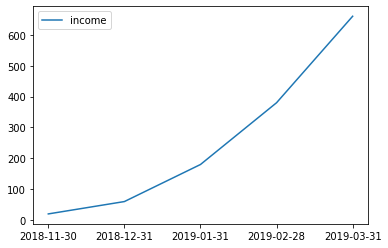

In [20]:
sns.lineplot(data=df);

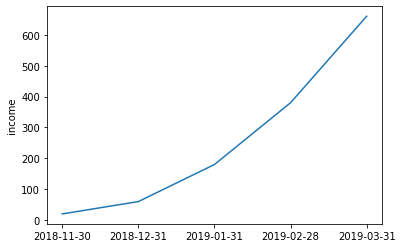

In [21]:
sns.lineplot(x=df.index, y=df.income);

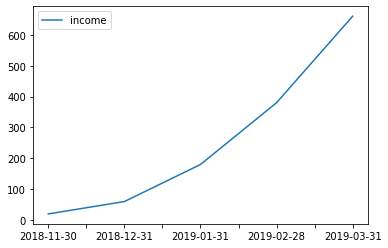

In [22]:
df.plot();

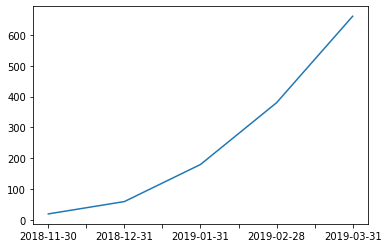

In [23]:
df['income'].plot();

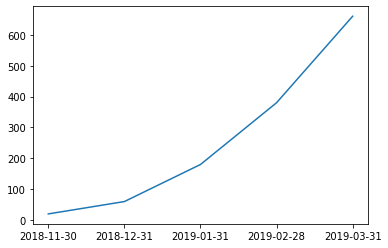

In [24]:
plt.plot(df.index, df.income);

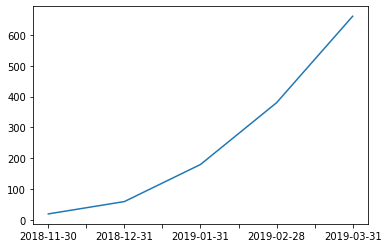

In [25]:
df.income.plot();

### Еще один пример (scatterplot)

In [49]:
df_1 = pd.read_csv('dataset_209770_6.txt', sep=' ')
df_1.head(3)

,x,y
0,1008.181007,1193.247309
1,894.345079,905.319467
2,685.011891,599.291807


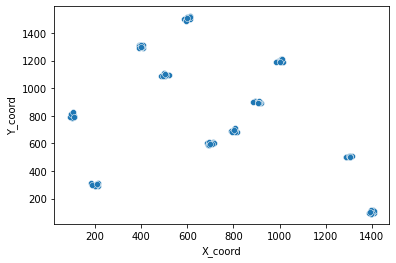

In [50]:
scplt = sns.scatterplot(x=df_1.x, y=df_1.y)
scplt.set_xlabel('X_coord')
scplt.set_ylabel('Y_coord');

### Heatmap

In [51]:
df_2 = pd.read_csv('https://stepik.org/media/attachments/course/4852/genome_matrix.csv', index_col=0)
df_2.head(3)

,species0,species1,species2,species3,species4
species0,0.536029,0.920292,0.679708,0.840606,0.430842
species1,0.920292,0.862417,0.887593,0.769754,0.203214
species2,0.679708,0.887593,0.595156,0.003435,0.096052


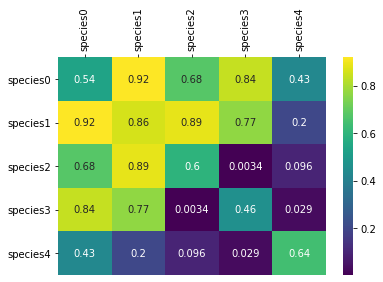

In [61]:
g = sns.heatmap(data=df_2, annot=True, cmap="viridis") #annot - значения в квадратах, cmap - цветовая гамма
g.xaxis.set_ticks_position('top') # устанавливает подписи сверху
g.xaxis.set_tick_params(rotation=90)

#### Узнать, какое количество ролей у большинства игроков

In [72]:
dota = pd.read_csv('https://stepik.org/media/attachments/course/4852/dota_hero_stats.csv')
dota.head(3)

,Unnamed: 0,attack_type,id,legs,localized_name,name,primary_attr,roles
0,0,Melee,1,2,Anti-Mage,npc_dota_hero_antimage,agi,"['Carry', 'Escape', 'Nuker']"
1,1,Melee,2,2,Axe,npc_dota_hero_axe,str,"['Initiator', 'Durable', 'Disabler', 'Jungler']"
2,2,Ranged,3,4,Bane,npc_dota_hero_bane,int,"['Support', 'Disabler', 'Nuker', 'Durable']"


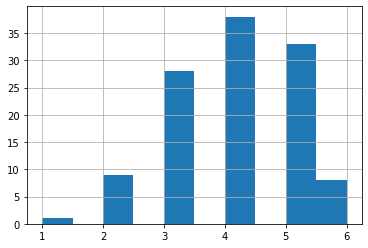

In [71]:
dota.roles.str.split(',').str.len().hist();

### График распределения параметров (kdeplot)

In [90]:
iris = pd.read_csv('https://stepik.org/media/attachments/course/4852/iris.csv', index_col=0)
iris.head(3)

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


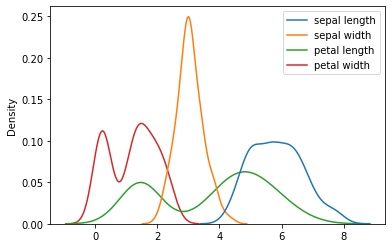

In [92]:
sns.kdeplot(data=iris.iloc[:, :4]);

### Violinplot (комбинация boxplot и оценки плотности ядра)

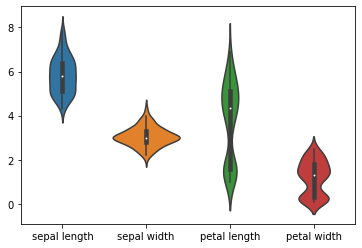

In [94]:
sns.violinplot(data=iris.iloc[:, :4]);

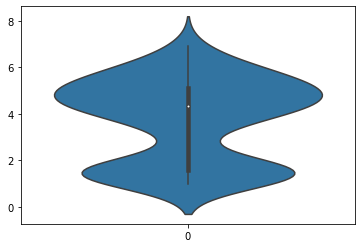

In [98]:
sns.violinplot(data=iris.loc[:, 'petal length']);

### Pairplot
Отражает зависимость (корреляцию) пар переменных друг от друга, а также распределение каждой из переменных.

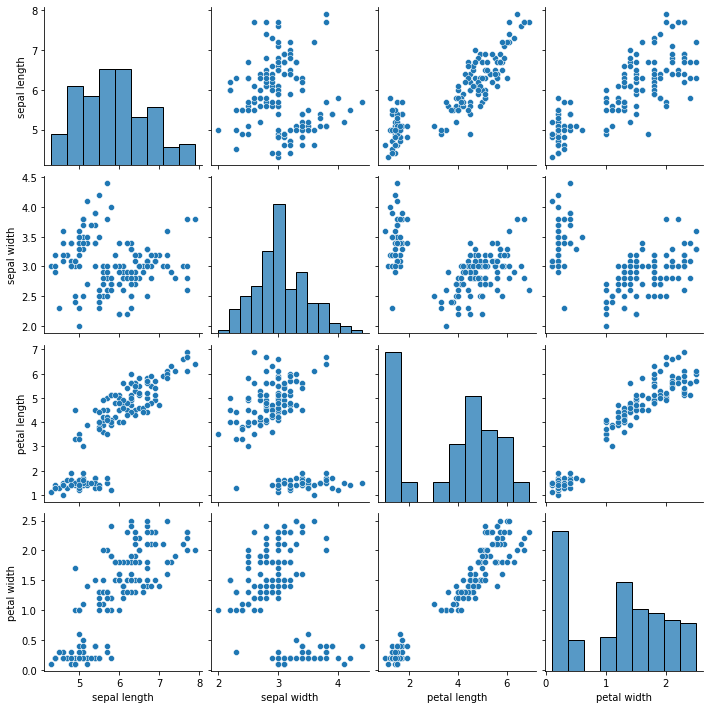

In [105]:
sns.pairplot(data=iris.iloc[:, :4]);